<a href="https://colab.research.google.com/github/MbuyiseloNtando/Flights/blob/main/Main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**

With predicted increase in African population in atleast the next 50 years, Flight Information Regions, ATC sectors and Aerodromes under Africa-Indian Ocean Region(AFI) need to track these changes, and forecast the number of passengers and Total movements in the AFI region.

Questions we would like to answer.
1. Will the number of Aircaft movents also increase in the next 5 years?
2. Will the total number of passsangers also increase in the next 5 years?
3. The busiest country airspace

In [80]:
import numpy as np
import pandas as pd

In [81]:
#Loading the final dataset
df = pd.read_csv('https://raw.githubusercontent.com/MbuyiseloNtando/Flights/main/Main%20project/AfricanMovements%20.csv')
df.head()

,Unnamed: 0,Country,Total Aircraft Movements,International Passengers,Domestic Passengers,Direct Transit Passengers,Total Passengers,Total Cargo,Year,Month,Population,GDP,GDP per capita
0,0,Algeria,7382,434295,184274,0,618569,2964,2019,1,42705368,183.687,4229.78
1,1,Algeria,6559,373545,174569,0,548114,3153,2019,2,42705368,183.687,4229.78
2,2,Algeria,7501,487640,191559,0,679199,3395,2019,3,42705368,183.687,4229.78
3,3,Algeria,7104,515891,195185,0,711076,3854,2019,4,42705368,183.687,4229.78
4,4,Algeria,6372,369155,137468,0,506623,4278,2019,5,42705368,183.687,4229.78


In [82]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    7247 non-null   object 
 1   Total Aircraft Movements   7247 non-null   int64  
 2   International Passengers   7247 non-null   int64  
 3   Domestic Passengers        7247 non-null   int64  
 4   Direct Transit Passengers  7247 non-null   int64  
 5   Total Passengers           7247 non-null   int64  
 6   Total Cargo                7247 non-null   int64  
 7   Year                       7247 non-null   int64  
 8   Month                      7247 non-null   int64  
 9   Population                 7247 non-null   int64  
 10  GDP                        7247 non-null   float64
 11  GDP per capita             7247 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 679.5+ KB


In [84]:
df['GDP'] = df.GDP.astype(str).str.replace('.', '').astype(int)
df.head()

,Country,Total Aircraft Movements,International Passengers,Domestic Passengers,Direct Transit Passengers,Total Passengers,Total Cargo,Year,Month,Population,GDP,GDP per capita
0,Algeria,7382,434295,184274,0,618569,2964,2019,1,42705368,183687,4229.78
1,Algeria,6559,373545,174569,0,548114,3153,2019,2,42705368,183687,4229.78
2,Algeria,7501,487640,191559,0,679199,3395,2019,3,42705368,183687,4229.78
3,Algeria,7104,515891,195185,0,711076,3854,2019,4,42705368,183687,4229.78
4,Algeria,6372,369155,137468,0,506623,4278,2019,5,42705368,183687,4229.78


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    7247 non-null   object 
 1   Total Aircraft Movements   7247 non-null   int64  
 2   International Passengers   7247 non-null   int64  
 3   Domestic Passengers        7247 non-null   int64  
 4   Direct Transit Passengers  7247 non-null   int64  
 5   Total Passengers           7247 non-null   int64  
 6   Total Cargo                7247 non-null   int64  
 7   Year                       7247 non-null   int64  
 8   Month                      7247 non-null   int64  
 9   Population                 7247 non-null   int64  
 10  GDP                        7247 non-null   int64  
 11  GDP per capita             7247 non-null   float64
dtypes: float64(1), int64(10), object(1)
memory usage: 679.5+ KB


In [86]:
df.isnull().sum()

Country                      0
Total Aircraft Movements     0
International Passengers     0
Domestic Passengers          0
Direct Transit Passengers    0
Total Passengers             0
Total Cargo                  0
Year                         0
Month                        0
Population                   0
GDP                          0
GDP per capita               0
dtype: int64

In [87]:
df.duplicated().sum()

173

In [88]:
df.drop_duplicates(inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7074 entries, 0 to 7246
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    7074 non-null   object 
 1   Total Aircraft Movements   7074 non-null   int64  
 2   International Passengers   7074 non-null   int64  
 3   Domestic Passengers        7074 non-null   int64  
 4   Direct Transit Passengers  7074 non-null   int64  
 5   Total Passengers           7074 non-null   int64  
 6   Total Cargo                7074 non-null   int64  
 7   Year                       7074 non-null   int64  
 8   Month                      7074 non-null   int64  
 9   Population                 7074 non-null   int64  
 10  GDP                        7074 non-null   int64  
 11  GDP per capita             7074 non-null   float64
dtypes: float64(1), int64(10), object(1)
memory usage: 718.5+ KB


In [90]:
df.describe()

,Total Aircraft Movements,International Passengers,Domestic Passengers,Direct Transit Passengers,Total Passengers,Total Cargo,Year,Month,Population,GDP,GDP per capita
count,7074.000000,7.074000e+03,7.074000e+03,7074.000000,7.074000e+03,7074.000000,7074.000000,7074.000000,7.074000e+03,7074.000000,7074.000000
mean,1320.732542,5.963528e+04,3.315436e+04,1943.221798,9.473289e+04,1352.131185,2020.979926,6.478372,4.217668e+07,91330.330365,3161.243837
std,2460.098391,1.686894e+05,1.015704e+05,9833.421838,2.364381e+05,5047.235849,1.422842,3.459756,4.397396e+07,137757.225681,2170.952366
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,2019.000000,1.000000,9.094500e+04,104.000000,245.811000
25%,78.000000,0.000000e+00,1.152500e+02,0.000000,1.010250e+03,0.000000,2020.000000,3.000000,1.295577e+07,12135.000000,1168.180000
50%,394.000000,1.660000e+03,2.216000e+03,0.000000,1.076800e+04,0.000000,2021.000000,6.000000,3.028560e+07,18909.000000,3331.080000
75%,1267.500000,3.409200e+04,1.319675e+04,457.000000,6.545875e+04,160.000000,2022.000000,9.000000,5.377130e+07,114858.000000,4051.930000
max,19005.000000,2.154657e+06,1.064517e+06,160697.000000,2.533520e+06,41139.000000,2023.000000,12.000000,2.186254e+08,504203.000000,20889.545000


From the table above table, the average Total aircraft movements is 1321 per month and the maximum is 19 005. While the average total passangers is 94 732 and the maximum is 2 533 520

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total Aircraft Movements')

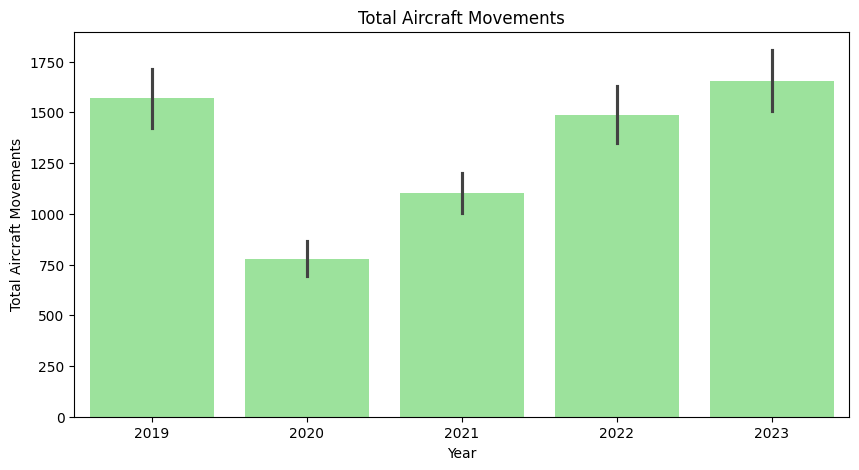

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Total Aircraft Movements'], x=df['Year'], color='lightgreen')
plt.title('Total Aircraft Movements')


Text(0.5, 1.0, 'Total Passengers')

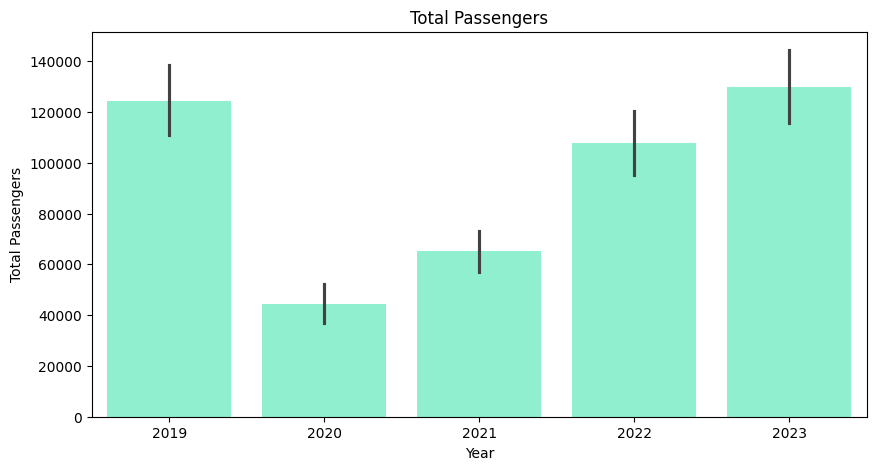

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Total Passengers'], x=df['Year'], color='aquamarine')
plt.title('Total Passengers')

In the figures above, in the year 2020 a drastic drop in Total aircraft movements and total passangers due to the Covid-19 pandemic can be seen

Text(0.5, 1.0, 'Total Aircraft Movements')

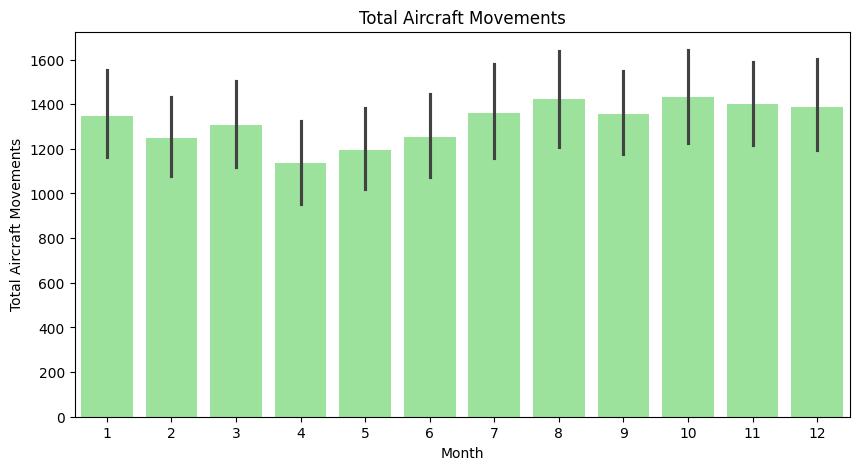

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Total Aircraft Movements'], x=df['Month'], color='lightgreen')
plt.title('Total Aircraft Movements')

Text(0.5, 1.0, 'Total Passengers')

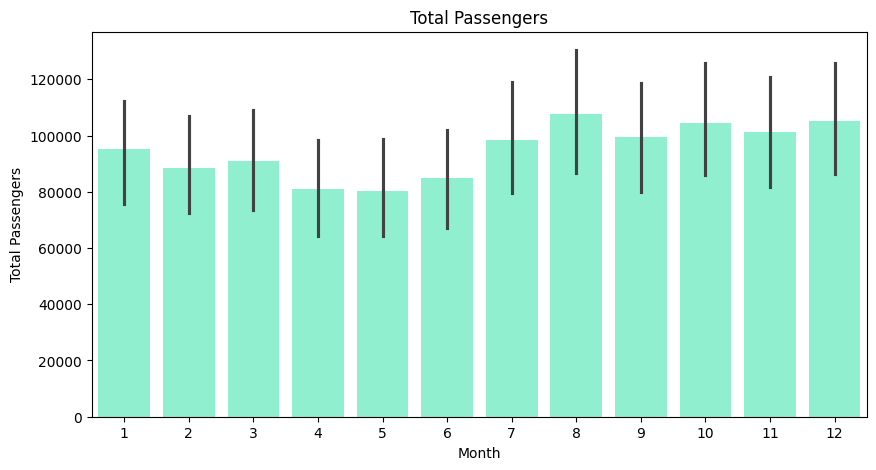

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Total Passengers'], x=df['Month'], color='aquamarine')
plt.title('Total Passengers')

Text(0.5, 1.0, 'Ten highest Total Aircraft Movements')

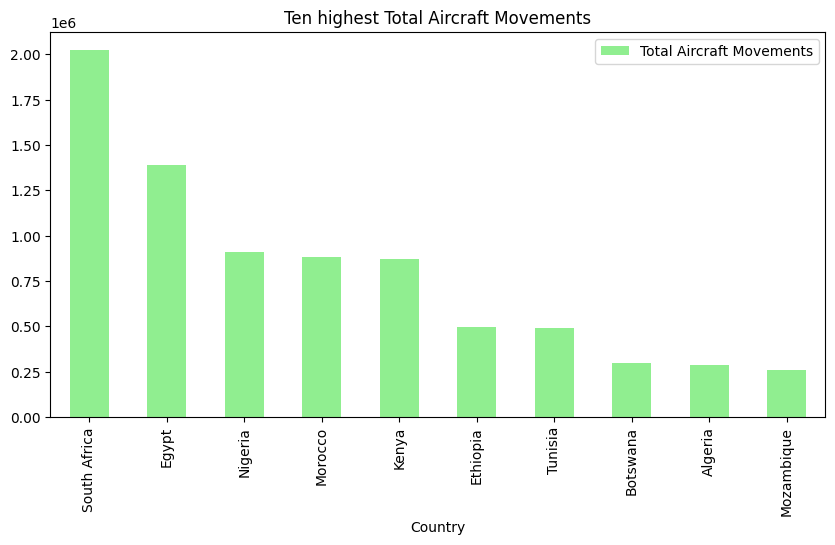

In [103]:
df.pivot_table(index='Country', values='Total Aircraft Movements', aggfunc='sum').sort_values(by='Total Aircraft Movements', ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Ten highest Total Aircraft Movements')
#df.sort_values(by='Total Passengers', ascending=False).head(10).plot(kind='bar', x='Country', y='Total Passengers', figsize=(10,5), color='aquamarine')

Text(0.5, 1.0, 'Ten highest Total Passengers')

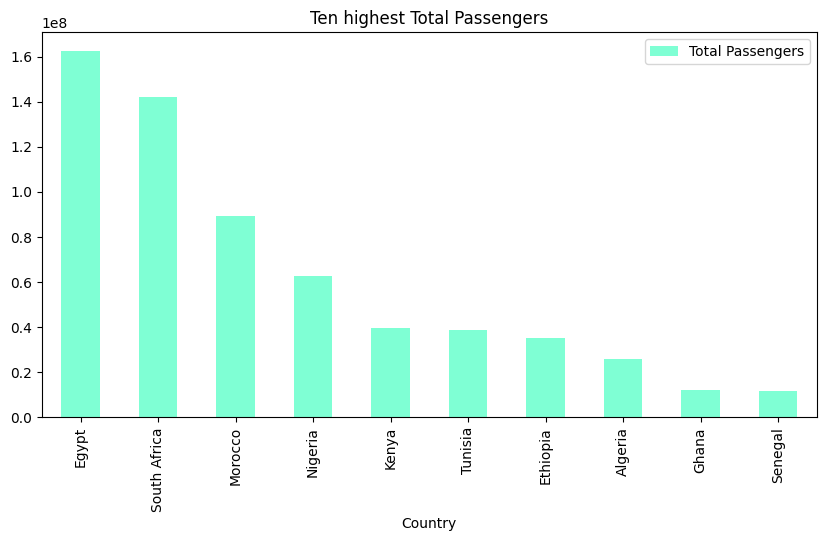

In [105]:
df.pivot_table(index='Country', values='Total Passengers', aggfunc='sum').sort_values(by='Total Passengers', ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='aquamarine')
plt.title('Ten highest Total Passengers')

<Axes: title={'center': 'Correlation map'}>

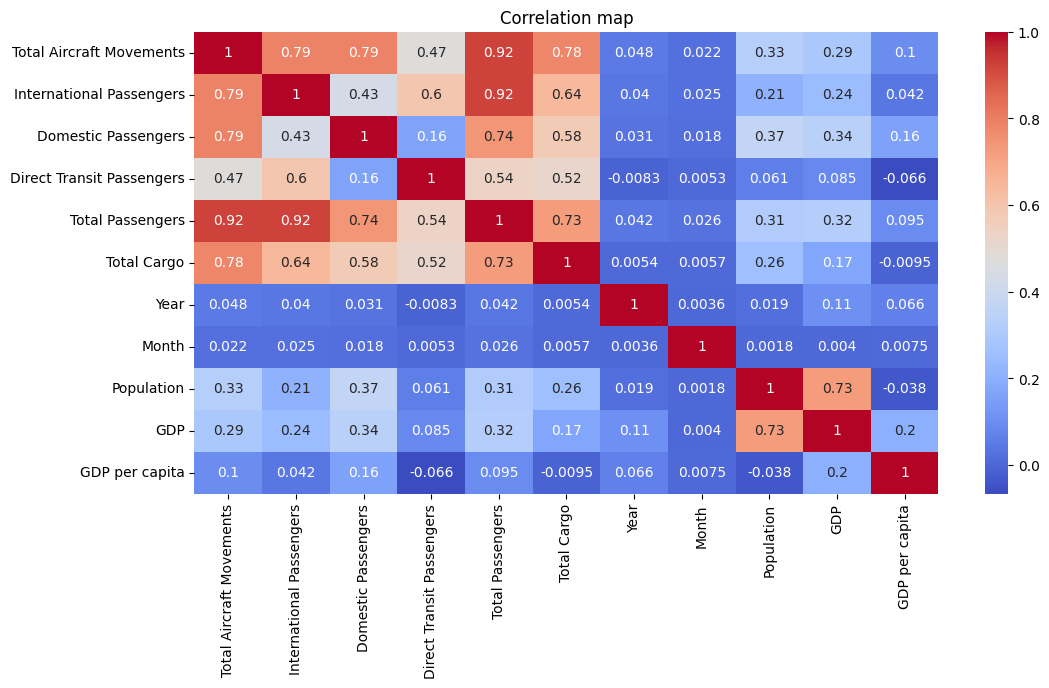

In [106]:
plt.figure(figsize=(12,6))
plt.title('Correlation map')
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)